In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification

In [4]:
import pandas as pd
import numpy as np

In [5]:
# path = '/content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification/'
path = '../'

In [6]:
dfs = []
for p in ['files/train_processed.csv', 'files/test_processed.csv', 'files/val_processed.csv' ]:
    dfs.append(pd.read_csv(path + p))

In [7]:
dfs[0].columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote', 'total_votes',
       'seizure_prob', 'lpd_prob', 'gpd_prob', 'lrda_prob', 'grda_prob',
       'other_prob'],
      dtype='object')

In [8]:
meta_data = [
    "eeg_id",
    "eeg_sub_id",
    "eeg_label_offset_seconds",
    "spectrogram_id",
    "spectrogram_sub_id",
    "spectrogram_label_offset_seconds",
    "label_id",
    "patient_id",
    "expert_consensus",
    "total_votes",
    "file_path",
]
class_votes = [
    "seizure_vote",
    "lpd_vote",
    "gpd_vote",
    "lrda_vote",
    "grda_vote",
    "other_vote",
]
class_probs = [
    "seizure_prob",
    "lpd_prob",
    "gpd_prob",
    "lrda_prob",
    "grda_prob",
    "other_prob",
]

In [9]:
for t, df in zip(['train', 'test', 'validation'],dfs):
    print(f"EEG count for {t} set: \t",df['eeg_id'].count())

EEG count for train set: 	 65509
EEG count for test set: 	 19514
EEG count for validation set: 	 21777


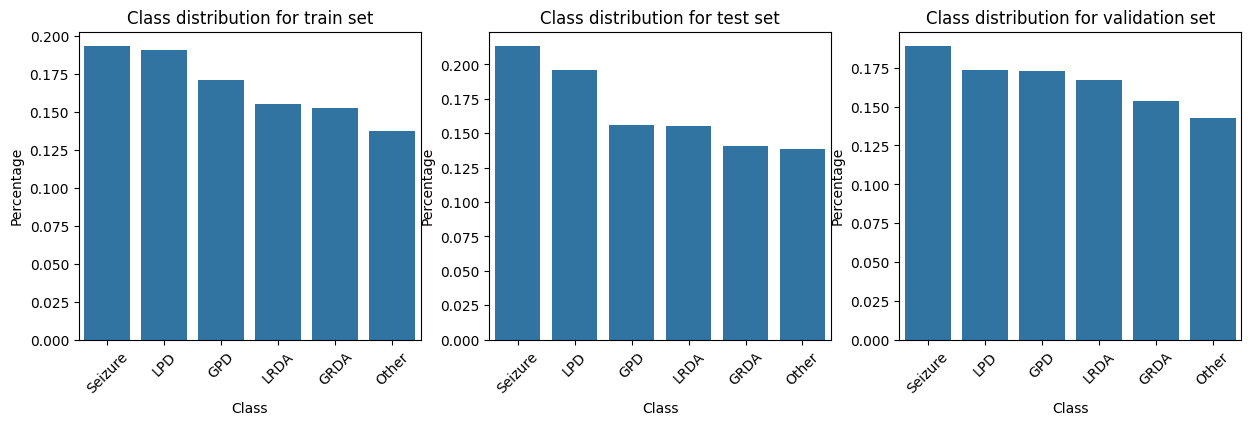

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, df in enumerate(dfs):
    sns.barplot(data=df[class_probs].idxmax(axis=1).value_counts(normalize=True), ax=ax[i])
    ax[i].set_title(f'Class distribution for {["train", "test", "validation"][i]} set')
    ax[i].set_xlabel('Class')
    ax[i].set_ylabel('Percentage')
    ax[i].set_xticks(range(6))
    ax[i].set_xticklabels(['Seizure', 'LPD', 'GPD', 'LRDA', 'GRDA', 'Other'], rotation=45)

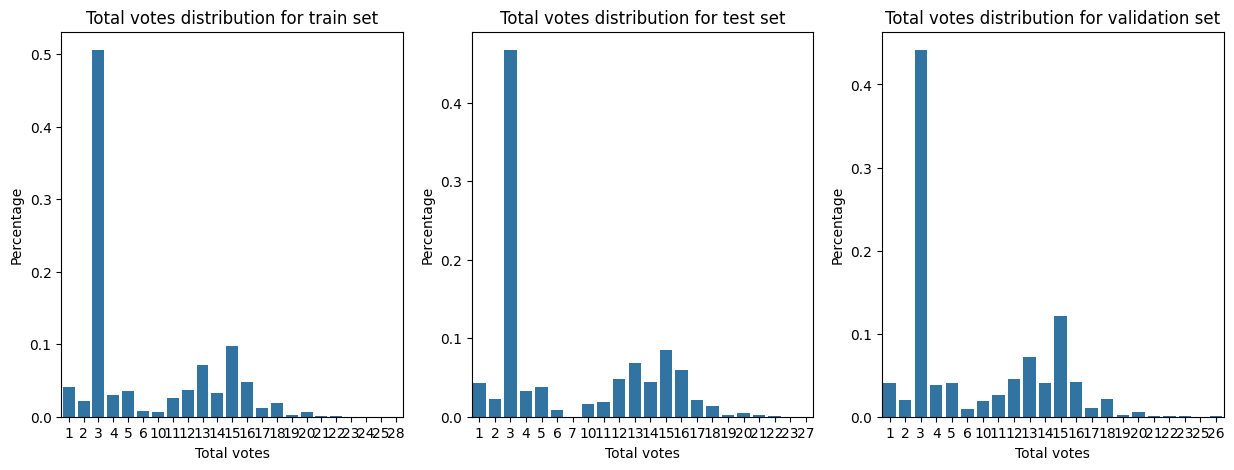

In [11]:
# compare the total votes distribution of the total votes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, df in enumerate(dfs):
    sns.barplot(data=df['total_votes'].value_counts(normalize=True), ax=ax[i])
    ax[i].set_title(f'Total votes distribution for {["train", "test", "validation"][i]} set')
    ax[i].set_xlabel('Total votes')
    ax[i].set_ylabel('Percentage')

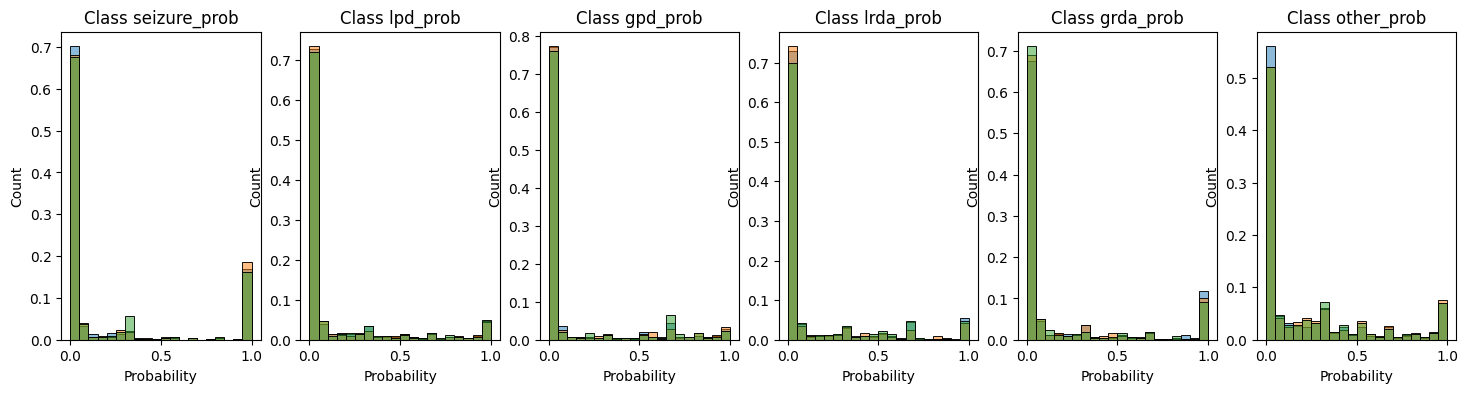

In [64]:
# for the first dataset plot the probability distribution of the classes, each class on a different plot
n = len(class_probs)
fig, ax = plt.subplots(1, n, figsize=(18,4))

for i, c in enumerate(class_probs):
    for j in range(3):
        # print(dfs[j][c].nunique())
        sns.histplot(data=dfs[j][c], ax=ax[i%n], bins = 20, stat='probability', alpha=0.5)

    ax[i%n].set_title(f'Class {c}')
    ax[i%n].set_xlabel('Probability')
    ax[i%n].set_ylabel('Count')

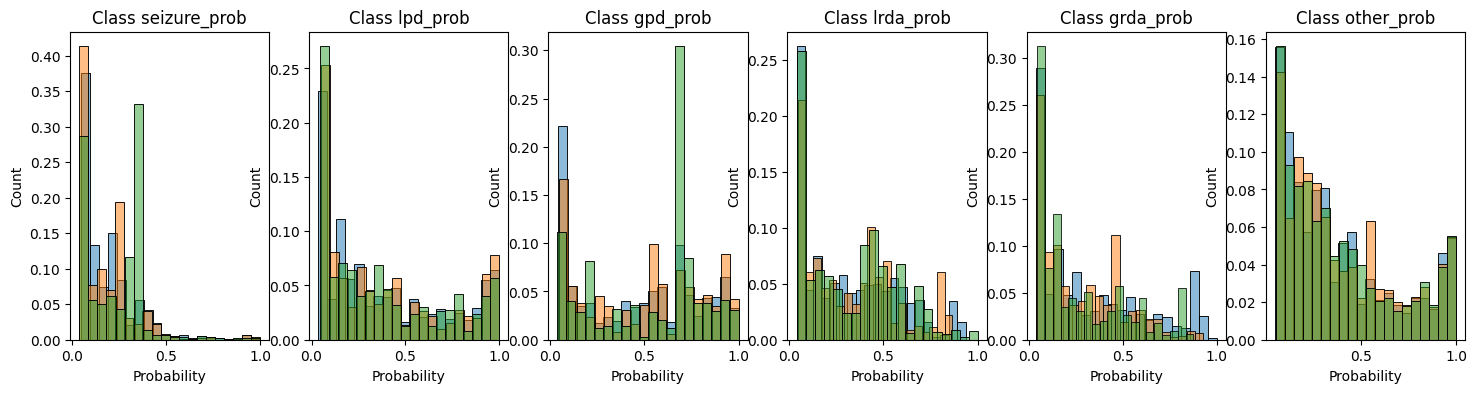

In [85]:
# for the first dataset plot the probability distribution of the classes, each class on a different plot
n = len(class_probs)
fig, ax = plt.subplots(1, n, figsize=(18, 4))


for i, c in enumerate(class_probs):
    for j in range(3):
        # print(dfs[j][c].nunique())
        mask =   (dfs[j][c] > 0) & (dfs[j]['total_votes'] > 6) #& (dfs[j]['total_votes'] < 5)
        # (dfs[j]['total_votes'] > 0)#
        sns.histplot(data=dfs[j][mask][c], ax=ax[i%n], bins = 20, stat='probability', alpha=0.5)

    ax[i%n].set_title(f'Class {c}')
    ax[i%n].set_xlabel('Probability')
    ax[i%n].set_ylabel('Count')

In [71]:
dfs[0][class_probs].head()

,seizure_prob,lpd_prob,gpd_prob,lrda_prob,grda_prob,other_prob
0,0.0,0.0625,0.0,0.875,0.0,0.0625
1,0.0,0.0625,0.0,0.875,0.0,0.0625
2,0.0,0.0625,0.0,0.875,0.0,0.0625
3,0.0,0.0625,0.0,0.875,0.0,0.0625
4,0.0,0.0625,0.0,0.875,0.0,0.0625


In [83]:
# number of data points for each eeg_id
dfs[0].groupby('eeg_id').size().value_counts()  

1      3785
2      1231
3       831
4       793
5       550
       ... 
109       1
142       1
562       1
433       1
226       1
Name: count, Length: 121, dtype: int64